In [1]:
import torch

### A Simple Function

In [2]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [3]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [4]:
torch.dot(x, x)

tensor(14., grad_fn=<DotBackward0>)

In [5]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [6]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [7]:
x.grad, 4 * x

(tensor([ 0.,  4.,  8., 12.]),
 tensor([ 0.,  4.,  8., 12.], grad_fn=<MulBackward0>))

In [8]:
x.grad == 4 * x

tensor([True, True, True, True])

In [9]:
x.sum()

tensor(6., grad_fn=<SumBackward0>)

In [10]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### Backward for Non-Scalar Variables

In [11]:
x, x * x

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

In [12]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [13]:
y.sum(), torch.ones(len(y))

(tensor(14., grad_fn=<SumBackward0>), tensor([1., 1., 1., 1.]))

### Detaching Computation

In [14]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [15]:
y, z, u, x.grad

(tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>),
 tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>),
 tensor([0., 1., 4., 9.]),
 tensor([0., 1., 4., 9.]))

In [16]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### Gradients and Python Control Flow

In [17]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [18]:
a = torch.randn(size=(), requires_grad=True)
a = torch.tensor(100., requires_grad=True)
d = f(a)
d.backward()
a, d

(tensor(100., requires_grad=True), tensor(1600., grad_fn=<MulBackward0>))

In [19]:
a.grad == d / a, a.grad

(tensor(True), tensor(16.))

###  Exercises

In [50]:
y = (x * 10).sum()
x, y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor(60., grad_fn=<SumBackward0>))

In [51]:
y.backward()
#y.backward() #error because graph is already "used"/deleted
x.grad

tensor([50., 52., 54., 56.])

In [52]:
a = torch.tensor([2.0, 1, 4, 3], requires_grad=True)
print('a norm:', a.norm())
d = f(a)
print('a:', a, 'd:', d, '\n')
d.sum().backward()
a, d

a norm: tensor(5.4772, grad_fn=<LinalgVectorNormBackward0>)
a: tensor([2., 1., 4., 3.], requires_grad=True) d: tensor([ 512.,  256., 1024.,  768.], grad_fn=<MulBackward0>) 



(tensor([2., 1., 4., 3.], requires_grad=True),
 tensor([ 512.,  256., 1024.,  768.], grad_fn=<MulBackward0>))

In [49]:
a.grad, d / a, a.grad == d / a

(tensor([256., 256., 256., 256.]),
 tensor([256., 256., 256., 256.], grad_fn=<DivBackward0>),
 tensor([True, True, True, True]))

In [102]:
import math

def sin(x):
    return torch.sin(x)
    
sin(torch.tensor(math.pi/2))

tensor(1.)

In [110]:
pi = math.pi
x = torch.arange(0, 4*pi, pi/32, requires_grad=True)
d = sin(x)
d.sum().backward()
d2 = x.grad

In [111]:
from d2l import torch as d2l
numpy_d = d.detach().numpy()
numpy_d2 = d2.detach().numpy()
x = x.detach().numpy()

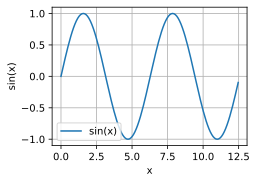

In [112]:
d2l.plot(x, [numpy_d], 'x', 'sin(x)', legend=['sin(x)'])

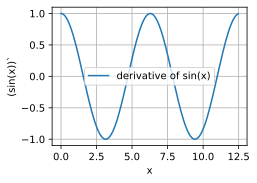

In [113]:
d2l.plot(x, [numpy_d2], 'x', '(sin(x))`', legend=['derivative of sin(x)'])